In [1]:
%load_ext zipline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from yahoofinancials import YahooFinancials

In [2]:
def download_csv_data(ticker, start_date, end_date, freq, path):
    
    yahoo_financials = YahooFinancials(ticker)

    df = yahoo_financials.get_historical_price_data(start_date, end_date, freq)
    df = pd.DataFrame(df[ticker]['prices']).drop(['date'], axis=1) \
            .rename(columns={'formatted_date':'date'}) \
            .loc[:, ['date','open','high','low','close','volume']] \
            .set_index('date')
    df.index = pd.to_datetime(df.index)
    df['dividend'] = 0
    df['split'] = 1

    # save data to csv for later ingestion
    df.to_csv(path, header=True, index=True)

    # plot the time series
    df.close.plot(title='{} prices --- {}:{}'.format(ticker, start_date, end_date));

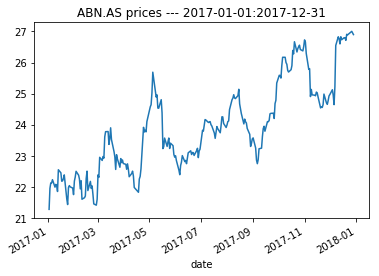

In [3]:
download_csv_data(ticker='ABN.AS', 
                  start_date='2017-01-01', 
                  end_date='2017-12-31', 
                  freq='daily', 
                  path='C:/Users/Sela#/Documents/Jupyter Projects/Data/abn.csv')

In [4]:
!head 'C:/Users/Sela#/Documents/Jupyter Projects/Data/abn.csv'

date,open,high,low,close,volume,dividend,split
2017-01-02,21.100000381469727,21.295000076293945,20.94499969482422,21.274999618530273,407919,0,1
2017-01-03,21.334999084472656,22.06999969482422,21.334999084472656,21.950000762939453,1453872,0,1
2017-01-04,21.989999771118164,22.135000228881836,21.934999465942383,22.125,1169976,0,1
2017-01-05,22.114999771118164,22.280000686645508,22.0,22.125,1102774,0,1
2017-01-06,22.100000381469727,22.25,22.045000076293945,22.229999542236328,766804,0,1
2017-01-09,22.21500015258789,22.219999313354492,21.93000030517578,21.989999771118164,1006061,0,1
2017-01-10,22.024999618530273,22.165000915527344,21.875,22.079999923706055,954217,0,1
2017-01-11,22.100000381469727,22.25,21.950000762939453,22.049999237060547,1140509,0,1
2017-01-12,21.90999984741211,22.104999542236328,21.829999923706055,21.850000381469727,1231540,0,1


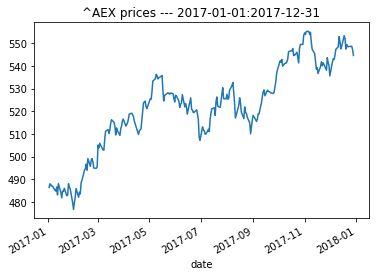

In [5]:
download_csv_data(ticker='^AEX', 
                  start_date='2017-01-01', 
                  end_date='2017-12-31', 
                  freq='daily', 
                  path='C:/Users/Sela#/Documents/Jupyter Projects/Data/aex.csv')

In [6]:
import os
from zipline.utils.run_algo import load_extensions

load_extensions(
    default=True,
    extensions=[],
    strict=True,
    environ=os.environ,
)

In [7]:
from zipline.data import bundles

bundle = bundles.load('eu_stocks')
bundle.asset_finder.retrieve_all(bundle.asset_finder.sids)

[Equity(0 [ABN]), Equity(1 [AEX])]

In [8]:
%%zipline --start 2017-1-2 --end 2017-12-29 --capital-base 250 --bundle eu_stocks -o buy_and_hold.pkl --trading-calendar XAMS



# imports
from zipline.api import order, symbol, record, set_benchmark

# parameters
selected_stock = 'ABN'
n_stocks_to_buy = 10

def initialize(context):
    set_benchmark(symbol('AEX'))
    context.asset = symbol('ABN')
    context.has_ordered = False  

def handle_data(context, data):
    # record price for further inspection
    record(price=data.current(symbol(selected_stock), 'price'))
    
    # trading logic
    if not context.has_ordered:
        # placing order, negative number for sale/short
        order(symbol(selected_stock), n_stocks_to_buy)
        # setting up a flag for holding a position
        context.has_ordered = True

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2017-01-02 16:30:00+00:00,NaN,0.000000,NaN,0.010826,NaN,NaN,0.00000,250.00000,0.00,0.00,...,0.0,0.0,0,NaN,250.00000,0.00,0.00,1,[],0.0
2017-01-03 16:30:00+00:00,0.005377,-0.000479,-0.174350,0.014193,0.084132,0.063908,-219.61975,30.38025,219.50,219.50,...,0.0,0.0,0,-11.224972,250.00000,0.00,0.00,2,"[{'dt': 2017-01-03 16:30:00+00:00, 'amount': 1...",0.0
2017-01-04 16:30:00+00:00,0.066491,0.006521,1.131266,0.013341,0.093841,-0.521389,0.00000,30.38025,221.25,221.25,...,0.0,0.0,0,124.836530,30.38025,219.50,219.50,3,[],0.0
2017-01-05 16:30:00+00:00,0.056968,0.006521,0.626082,0.011990,0.089273,-0.284848,0.00000,30.38025,221.25,221.25,...,0.0,0.0,0,108.111606,30.38025,221.25,221.25,4,[],0.0
2017-01-06 16:30:00+00:00,0.052435,0.010681,0.734502,0.012137,0.079917,-0.322860,0.00000,30.38025,222.29,222.29,...,0.0,0.0,0,157.954187,30.38025,221.25,221.25,5,[],0.0
2017-01-09 16:30:00+00:00,0.088772,0.001081,-0.024659,0.008189,0.082406,0.212205,0.00000,30.38025,219.89,219.89,...,0.0,0.0,0,0.789670,30.38025,222.29,222.29,6,[],0.0
2017-01-10 16:30:00+00:00,0.083570,0.004681,0.127588,0.007438,0.076290,0.161802,0.00000,30.38025,220.79,220.79,...,0.0,0.0,0,2.999786,30.38025,219.89,219.89,7,[],0.0
2017-01-11 16:30:00+00:00,0.078082,0.003481,0.068195,0.011262,0.072269,0.123732,0.00000,30.38025,220.49,220.49,...,0.0,0.0,0,2.084812,30.38025,220.79,220.79,8,[],0.0
2017-01-12 16:30:00+00:00,0.085439,-0.004479,-0.167120,0.004009,0.081440,0.388791,0.00000,30.38025,218.50,218.50,...,0.0,0.0,0,-1.859323,30.38025,220.49,220.49,9,[],0.0
2017-01-13 16:30:00+00:00,0.164500,0.023481,0.187382,0.014401,0.091445,1.125972,0.00000,30.38025,225.49,225.49,...,0.0,0.0,0,9.567916,30.38025,218.50,218.50,10,[],0.0


In [9]:
# read the performance summary dataframe
buy_and_hold_results = pd.read_pickle('buy_and_hold.pkl')

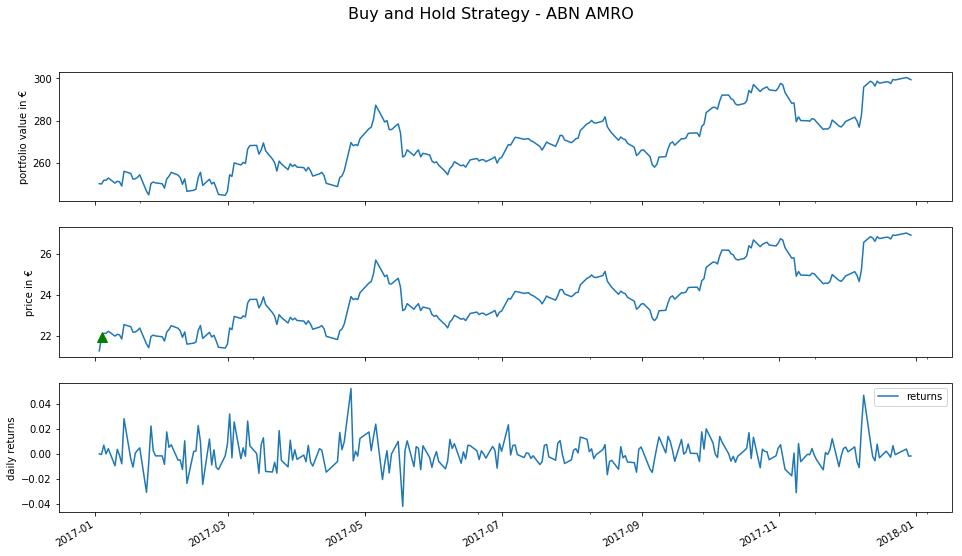

Final portfolio value (including cash): 299.37€


In [10]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=[16, 9])

# portfolio value
buy_and_hold_results.portfolio_value.plot(ax=ax[0])
ax[0].set_ylabel('portfolio value in €')

# asset
buy_and_hold_results.price.plot(ax=ax[1])
ax[1].set_ylabel('price in €')

# mark transactions
perf_trans = buy_and_hold_results.loc[[t != [] for t in buy_and_hold_results.transactions]]
buys = perf_trans.loc[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
sells = perf_trans.loc[[t[0]['amount'] < 0 for t in perf_trans.transactions]]
ax[1].plot(buys.index, buy_and_hold_results.price.loc[buys.index], '^', markersize=10, color='g', label='buy')
ax[1].plot(sells.index, buy_and_hold_results.price.loc[sells.index], 'v', markersize=10, color='r', label='sell')

# daily returns
buy_and_hold_results.returns.plot(ax=ax[2])
ax[2].set_ylabel('daily returns')

fig.suptitle('Buy and Hold Strategy - ABN AMRO', fontsize=16)
plt.legend()
plt.show()

print('Final portfolio value (including cash): {}€'.format(np.round(buy_and_hold_results.portfolio_value[-1], 2)))

In [11]:
pd.DataFrame.from_records([x[0] for x in buy_and_hold_results.transactions.values if x != []])

,amount,commission,dt,order_id,price,sid
0,10,None,2017-01-03 16:30:00+00:00,f41de776056248feb0365cad32389312,21.960975,Equity(0 [ABN])


In [13]:
buy_and_hold_results.columns

Index(['algo_volatility', 'algorithm_period_return', 'alpha',
       'benchmark_period_return', 'benchmark_volatility', 'beta',
       'capital_used', 'ending_cash', 'ending_exposure', 'ending_value',
       'excess_return', 'gross_leverage', 'long_exposure', 'long_value',
       'longs_count', 'max_drawdown', 'max_leverage', 'net_leverage', 'orders',
       'period_close', 'period_label', 'period_open', 'pnl', 'portfolio_value',
       'positions', 'price', 'returns', 'sharpe', 'short_exposure',
       'short_value', 'shorts_count', 'sortino', 'starting_cash',
       'starting_exposure', 'starting_value', 'trading_days', 'transactions',
       'treasury_period_return'],
      dtype='object')

C:\Anaconda\envs\env_zipline\lib\site-packages\empyrical\stats.py:704: RuntimeWarning: invalid value encountered in true_divide
  out=out,
C:\Anaconda\envs\env_zipline\lib\site-packages\empyrical\stats.py:790: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


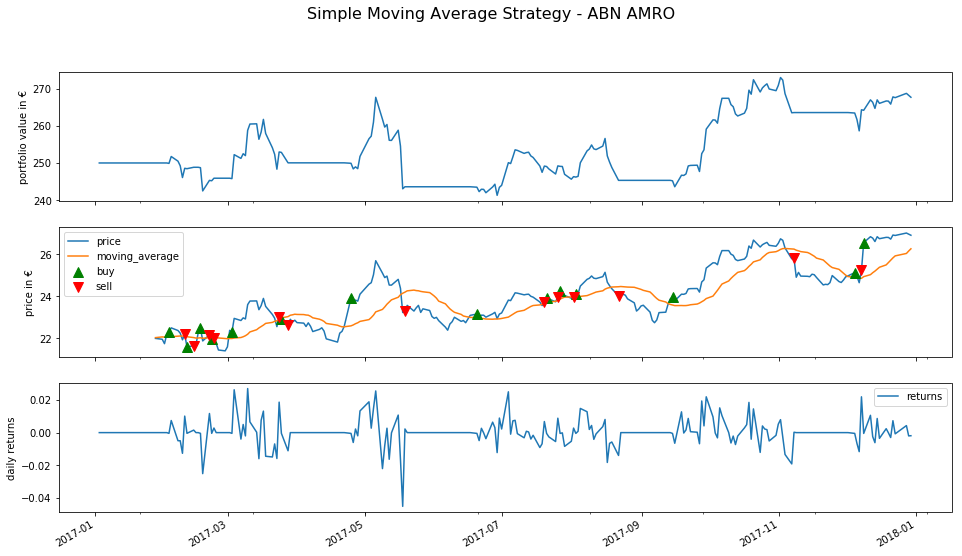

Final portfolio value (including cash): 267.68€


,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2017-01-02 16:30:00+00:00,NaN,0.000000,NaN,0.010826,NaN,NaN,0.000000,250.000000,0.00,0.00,...,0.0,0.0,0,NaN,250.000000,0.00,0.00,1,[],0.0
2017-01-03 16:30:00+00:00,0.000000,0.000000,0.000000,0.014193,0.084132,0.000000,0.000000,250.000000,0.00,0.00,...,0.0,0.0,0,NaN,250.000000,0.00,0.00,2,[],0.0
2017-01-04 16:30:00+00:00,0.000000,0.000000,0.000000,0.013341,0.093841,0.000000,0.000000,250.000000,0.00,0.00,...,0.0,0.0,0,NaN,250.000000,0.00,0.00,3,[],0.0
2017-01-05 16:30:00+00:00,0.000000,0.000000,0.000000,0.011990,0.089273,0.000000,0.000000,250.000000,0.00,0.00,...,0.0,0.0,0,NaN,250.000000,0.00,0.00,4,[],0.0
2017-01-06 16:30:00+00:00,0.000000,0.000000,0.000000,0.012137,0.079917,0.000000,0.000000,250.000000,0.00,0.00,...,0.0,0.0,0,NaN,250.000000,0.00,0.00,5,[],0.0
2017-01-09 16:30:00+00:00,0.000000,0.000000,0.000000,0.008189,0.082406,0.000000,0.000000,250.000000,0.00,0.00,...,0.0,0.0,0,NaN,250.000000,0.00,0.00,6,[],0.0
2017-01-10 16:30:00+00:00,0.000000,0.000000,0.000000,0.007438,0.076290,0.000000,0.000000,250.000000,0.00,0.00,...,0.0,0.0,0,NaN,250.000000,0.00,0.00,7,[],0.0
2017-01-11 16:30:00+00:00,0.000000,0.000000,0.000000,0.011262,0.072269,0.000000,0.000000,250.000000,0.00,0.00,...,0.0,0.0,0,NaN,250.000000,0.00,0.00,8,[],0.0
2017-01-12 16:30:00+00:00,0.000000,0.000000,0.000000,0.004009,0.081440,0.000000,0.000000,250.000000,0.00,0.00,...,0.0,0.0,0,NaN,250.000000,0.00,0.00,9,[],0.0
2017-01-13 16:30:00+00:00,0.000000,0.000000,0.000000,0.014401,0.091445,0.000000,0.000000,250.000000,0.00,0.00,...,0.0,0.0,0,NaN,250.000000,0.00,0.00,10,[],0.0


In [15]:
%%zipline --start 2017-1-2 --end 2017-12-29 --capital-base 250 --bundle eu_stocks -o sma_strategy.pkl --trading-calendar XAMS

# imports 
from zipline.api import order_target, record, symbol, set_benchmark
from zipline.finance import commission
import matplotlib.pyplot as plt
import numpy as np

# parameters 
ma_periods = 20
selected_stock = 'ABN'
n_stocks_to_buy = 10

def initialize(context):
    context.time = 0
    context.asset = symbol(selected_stock)
    set_benchmark(symbol('AEX'))
    # 1. manually setting the commission
    context.set_commission(commission.PerShare(cost=0.0, min_trade_cost=0))

def handle_data(context, data):
    # 2. warm-up period
    context.time += 1
    if context.time < ma_periods:
        return

    # 3. access price history
    price_history = data.history(context.asset, fields="price", bar_count=ma_periods, frequency="1d")
 
    # 4. calculate moving averages
    ma = price_history.mean()
    
    # 5. trading logic
    
    # cross up
    if (price_history[-2] < ma) & (price_history[-1] > ma):
        order_target(context.asset, n_stocks_to_buy)
    # cross down
    elif (price_history[-2] > ma) & (price_history[-1] < ma):
        order_target(context.asset, 0)

    # save values for later inspection
    record(price=data.current(context.asset, 'price'),
           moving_average=ma)
    
# 6. analyze block
def analyze(context, perf):
    fig, ax = plt.subplots(3, 1, sharex=True, figsize=[16, 9])

    # portfolio value
    perf.portfolio_value.plot(ax=ax[0])
    ax[0].set_ylabel('portfolio value in €')
    
    # asset
    perf[['price', 'moving_average']].plot(ax=ax[1])
    ax[1].set_ylabel('price in €')
    
    # mark transactions
    perf_trans = perf.loc[[t != [] for t in perf.transactions]]
    buys = perf_trans.loc[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.loc[[t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax[1].plot(buys.index, perf.price.loc[buys.index], '^', markersize=10, color='g', label='buy')
    ax[1].plot(sells.index, perf.price.loc[sells.index], 'v', markersize=10, color='r', label='sell')
    ax[1].legend()
    
    # daily returns
    perf.returns.plot(ax=ax[2])
    ax[2].set_ylabel('daily returns')

    fig.suptitle('Simple Moving Average Strategy - ABN AMRO', fontsize=16)
    plt.legend()
    plt.show()
    
    print('Final portfolio value (including cash): {}€'.format(np.round(perf.portfolio_value[-1], 2)))